# Code soft - project - III 

## Sales prediction 

In [37]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
# Load the dataset
data = pd.read_csv("advertising.csv")  # Replace "your_dataset.csv" with your actual dataset path
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## visualizations 

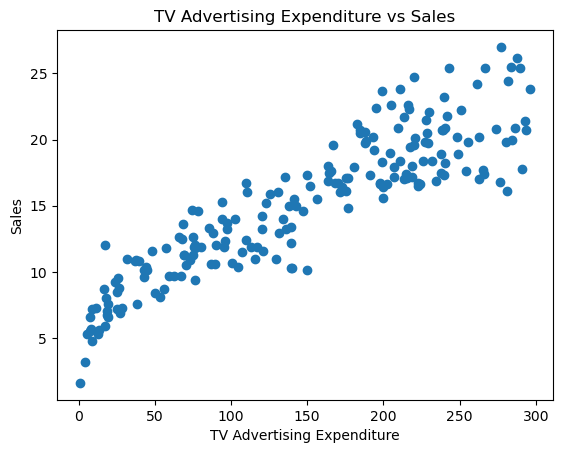

In [19]:
# Creating scatter plot for TV advertising expenditure vs sales
plt.scatter(data['TV'], data['Sales'])
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('TV Advertising Expenditure vs Sales')
plt.show()


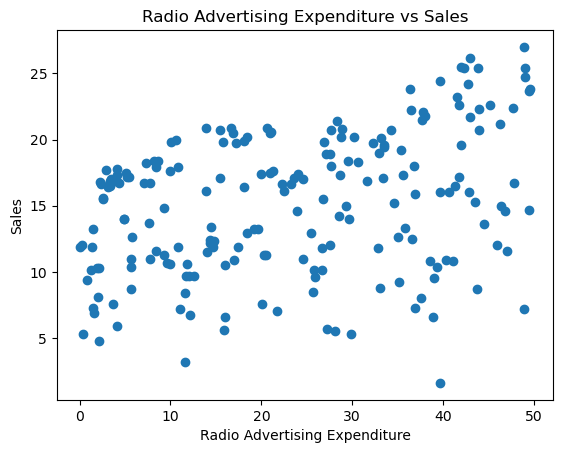

In [20]:
# Creating scatter plot for Radio advertising expenditure vs sales
plt.scatter(data['Radio'], data['Sales'])
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Radio Advertising Expenditure vs Sales')
plt.show()

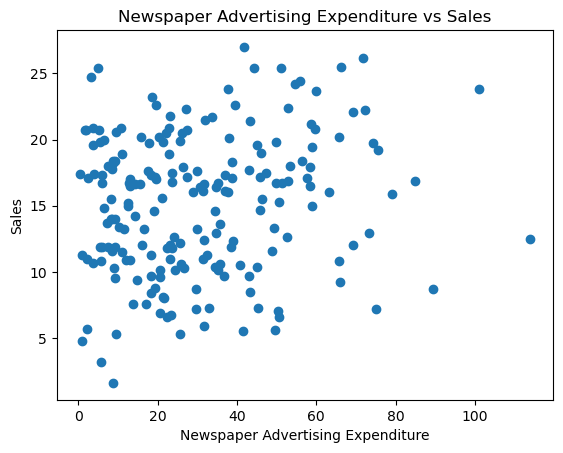

In [21]:
# Creating scatter plot for Newspaper advertising expenditure vs sales
plt.scatter(data['Newspaper'], data['Sales'])
plt.xlabel('Newspaper Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Newspaper Advertising Expenditure vs Sales')
plt.show()

<Axes: >

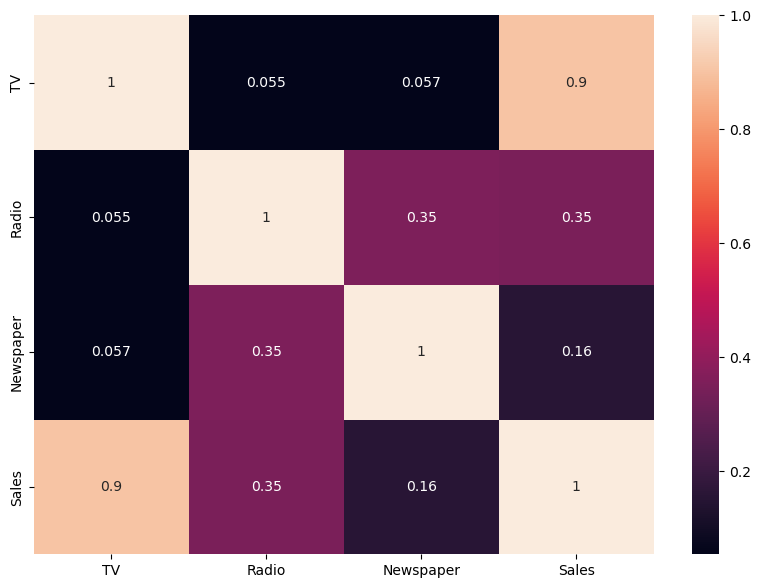

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot = True)

## Modelling 

In [11]:
# Preprocessing the data
X = data[["TV","Radio","Newspaper"]]
y = data["Sales"]

In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [27]:
# model is your trained linear regression model
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')


Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214134


## Modelling summary

In [41]:
# Evaluating the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Assuming y_true and y_pred are defined
r_squared = r2_score(y_test, y_pred)

In [40]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f'R-squared: {r_squared}')

Mean Squared Error: 2.9077569102710923
Mean Absolute Error: 1.2748262109549344
R-squared: 0.9059011844150826


C:\Users\91630\AppData\Local\Temp\ipykernel_492\2077165099.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred))


<Axes: xlabel='Sales', ylabel='Density'>

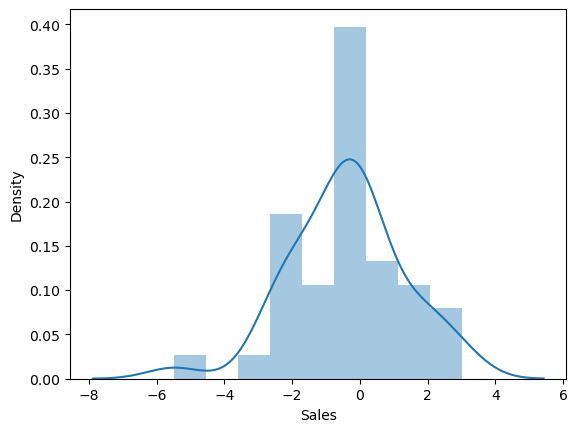

In [33]:
sns.distplot((y_test-y_pred))